# HELP INTERNATIONAL

## PROBLEM STATEMENT
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

In [1]:
# setting working directory
import os
os.chdir("C:\\Users\\deepi\\Desktop\\data science\\Machine Learning\\Clustering\\Assignment")

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#supress warnings
import warnings
warnings.filterwarnings("ignore")

#For Scaling
import sklearn
from sklearn.preprocessing import StandardScaler

#For K-mean Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#For Hierarchical Clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## UNDERSTANDING DATA

In [3]:
# Importing Data
data = pd.read_csv("Country-data.csv")

In [4]:
# Top 5 rows of Dataframe
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
# Shape of the Dataframe
data.shape

(167, 10)

In [6]:
# checking data type of variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
#Checking null values
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

#### Observation
- There is no null values in the data set 

In [8]:
# Statictical summary of Dataframe
data.describe(percentiles=[0.05,0.25,0.5,0.75,0.9,0.95,0.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
5%,3.460000,12.120000,2.791000,18.130000,1213.000000,0.183400,55.780000,1.390000,465.900000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000


## DATA CLEANING

In [9]:
# converting percentage variable into absolute values
percentage_var_list = ["imports", "health", "exports"]
data["imports"] = (data["imports"]/100)*data["gdpp"]
data["health"] = (data["health"]/100)*data["gdpp"]
data["exports"] = (data["exports"]/100)*data["gdpp"]

## EXPLORATORY DATA ANALYSIS

### Univariate Analysis

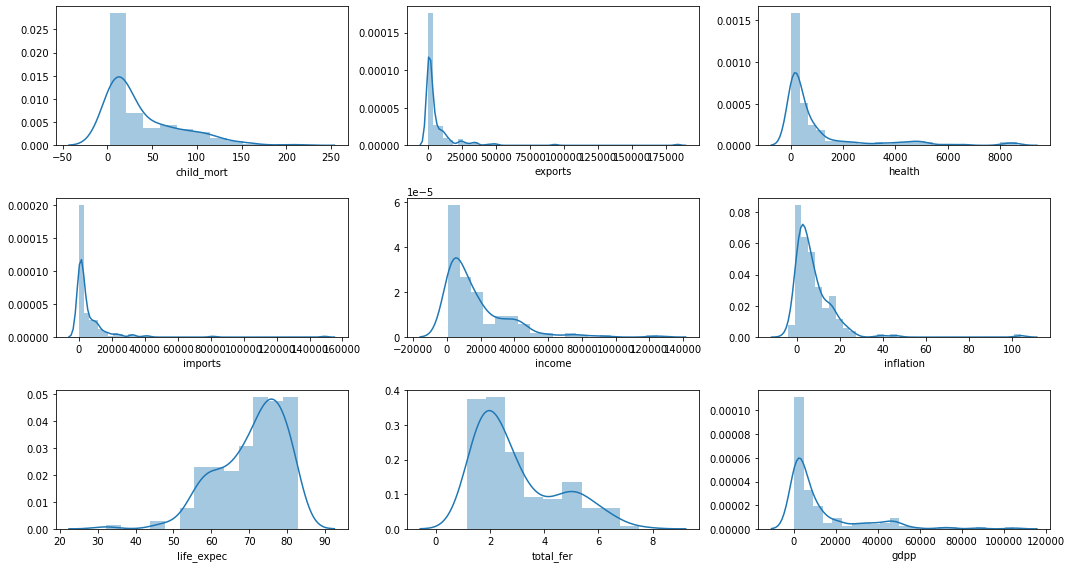

In [10]:
# Distribution plot of all the continious variables in the dataset
plt.figure(figsize = (15,8))
plt.subplot(3,3,1)
sns.distplot(data["child_mort"])

plt.subplot(3,3,2)
sns.distplot(data["exports"])

plt.subplot(3,3,3)
sns.distplot(data["health"])

plt.subplot(3,3,4)
sns.distplot(data["imports"])

plt.subplot(3,3,5)
sns.distplot(data["income"])

plt.subplot(3,3,6)
sns.distplot(data["inflation"])

plt.subplot(3,3,7)
sns.distplot(data["life_expec"])

plt.subplot(3,3,8)
sns.distplot(data["total_fer"])

plt.subplot(3,3,9)
sns.distplot(data["gdpp"])

plt.tight_layout()
plt.show()

#### Observation
- Some of the Variables - child mortality, income, life expectancy, total ferility and gdpp have chance of internal grouping Therefore, for these variables we can do our further analysis.

### Bivariate Analysis

In [11]:
# Bar plot between country and other variable in the data set
def country_vs_var_bar_plot(Variable):
    df_assending_var = data.sort_values(ascending= False, by = Variable)
    df_assending_var_top_10 = pd.DataFrame(df_assending_var[["country", Variable]].head(10).reset_index(drop=True))
    
    df_assending_var_bottom_10 = pd.DataFrame(df_assending_var[["country", Variable]].tail(10).reset_index(drop=True))
    
    plt.figure(figsize = (15,7))
    plt.subplot(1,2,1)
    sns.barplot( x = "country", y = Variable, data = df_assending_var_top_10)
    plt.xticks(rotation = 90)
    plt.title("Top 10 Countries having Highest"+ " " + Variable)
    
    plt.subplot(1,2,2)
    sns.barplot( x = "country", y = Variable, data = df_assending_var_bottom_10)
    plt.xticks(rotation = 90)
    plt.title("Countries having Lowest"+ " " + Variable)
    
    plt.show();


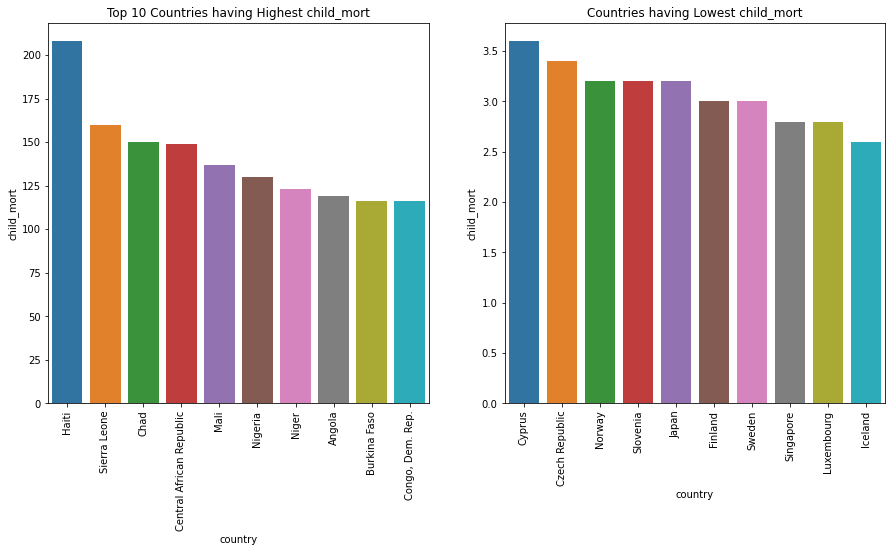

In [12]:
# Country vs Child Mortality
country_vs_var_bar_plot("child_mort")

#### Observation
- Child mortality is more then 200 Haiti
- Child mortality is very less, less than 3 in the following countries - Luxembourg, Iceland and Singapore.

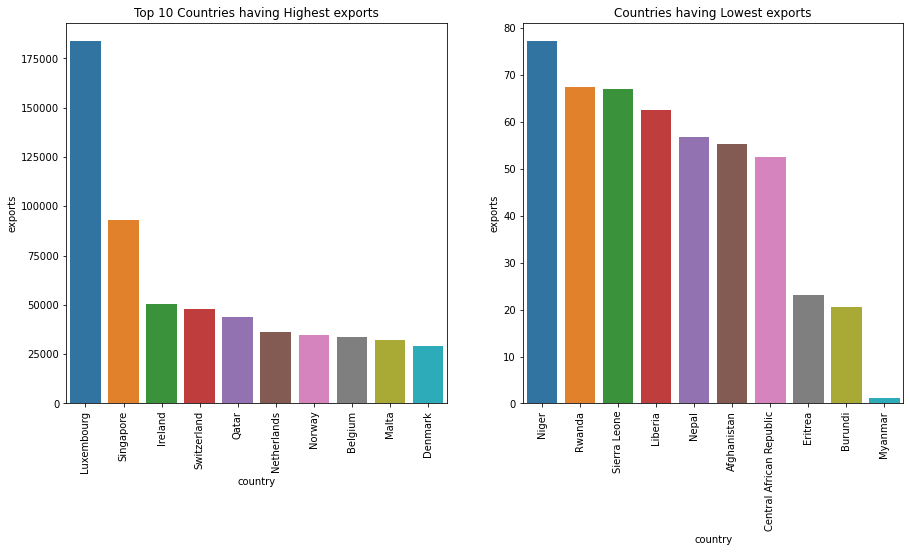

In [13]:
# Country vs Export
country_vs_var_bar_plot("exports")

#### Observations
- Exports of goods and services are high in Luxembourg.
- Exports of goods and services are very less in Myanmar, almost 0

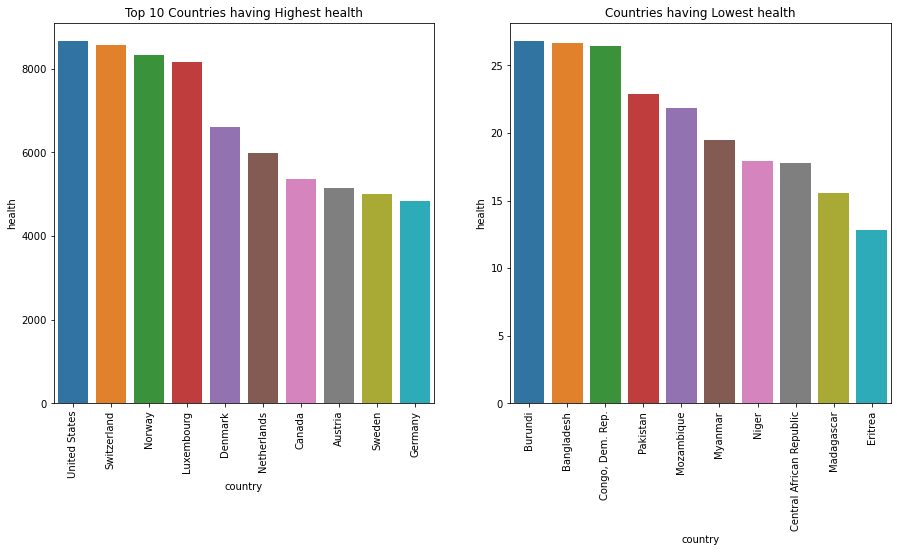

In [14]:
# Country vs health
country_vs_var_bar_plot("health")

#### Observations
- Total health spending per capita is higher than 8000 in United States, Switzerland, Norway and Luxembourg
- Total health spending per capita is lesser than 20 in Eritrea, Madagascar, Central African Republic, Niger and Myanmar

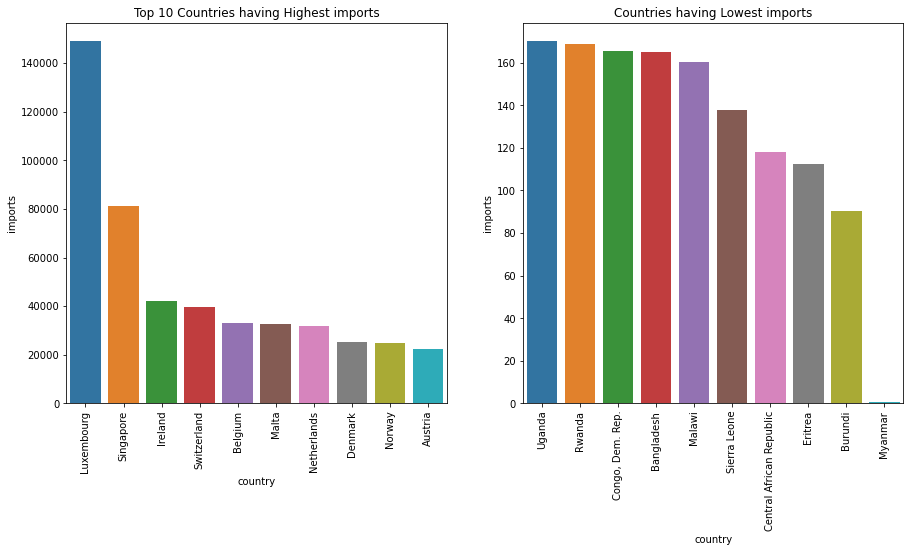

In [15]:
# Country vs Child imports
country_vs_var_bar_plot("imports")

#### Observations
- Imports of goods and services per capita is very high in Luxembourg
- Imports of goods and services per capita is very less in Myanmar, almost 0

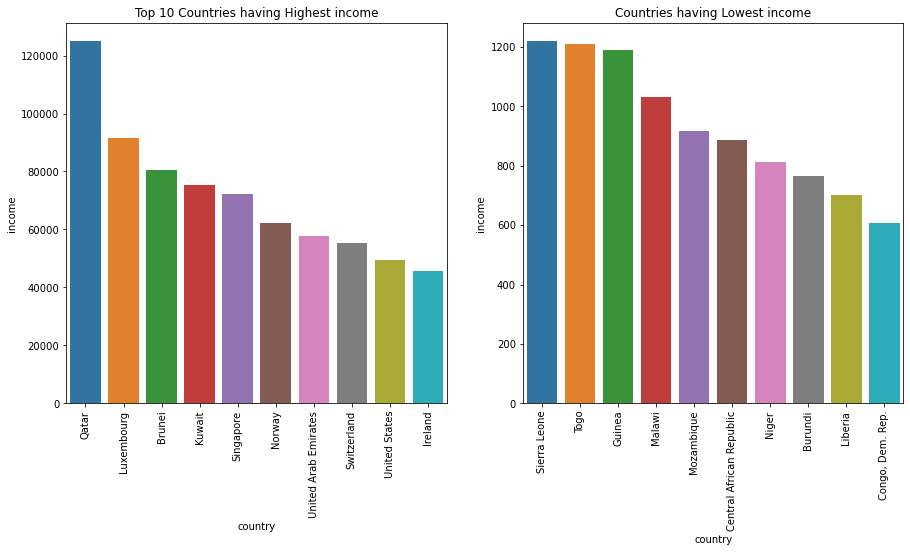

In [16]:
# Country vs income
country_vs_var_bar_plot("income")

#### Observations
 - Net income per person is highest in Qatar followed by Luxembourg.
 - Net income per person is very less in Congo,Dem. Rep.

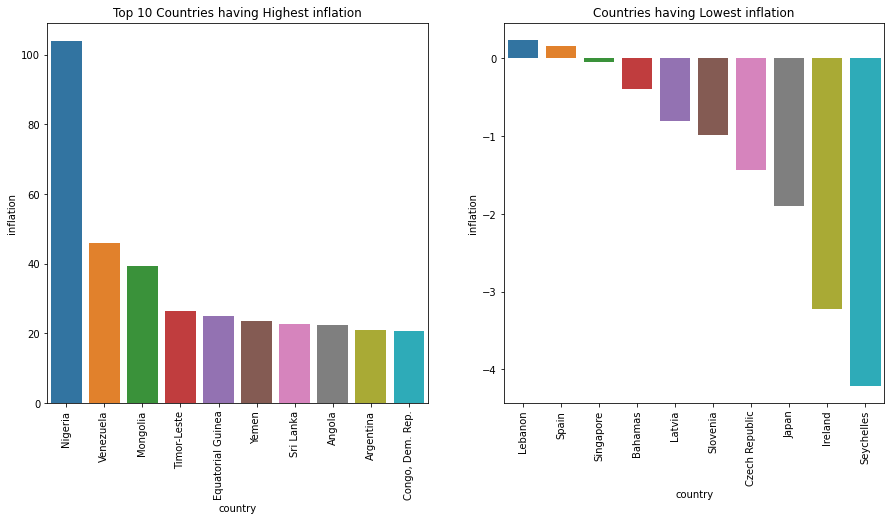

In [17]:
# Country vs inflation
country_vs_var_bar_plot("inflation")

#### Observations
- The measurement of the annual growth rate of the Total GDP is highest in Nigeria
- The measurement of the annual growth rate of the Total GDP is lesser then -2 in Ireland and Seychelles

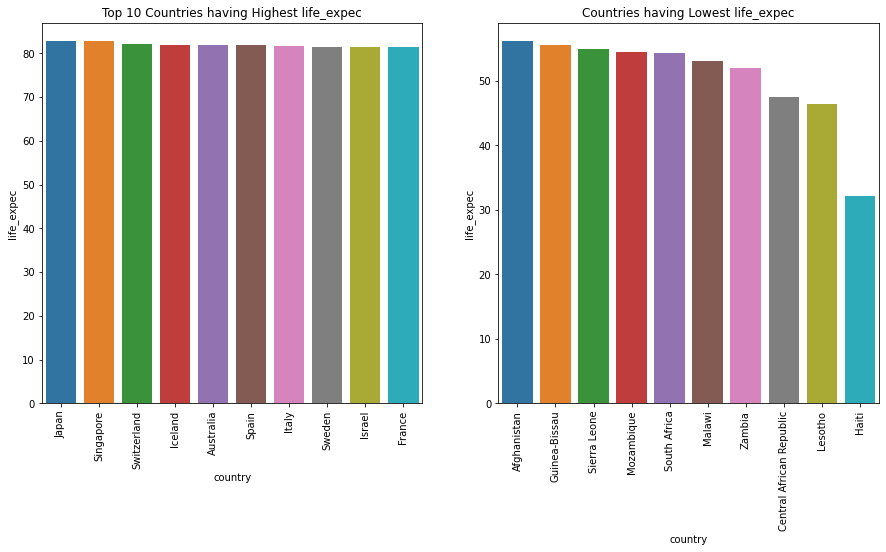

In [18]:
## Country vs life expectancy
country_vs_var_bar_plot("life_expec")

#### Obeservation
- The average number of years a new born child would live is lesser then 40 in Haiti.

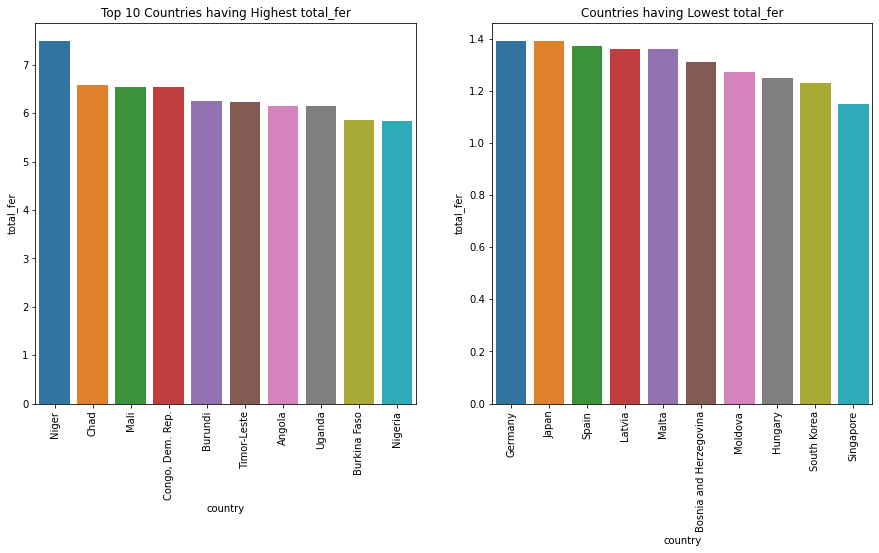

In [19]:
# Country vs total fertility
country_vs_var_bar_plot("total_fer")

#### Observations
- Total fertility is highest in Niger
- Total fertility is lowest in Singapore

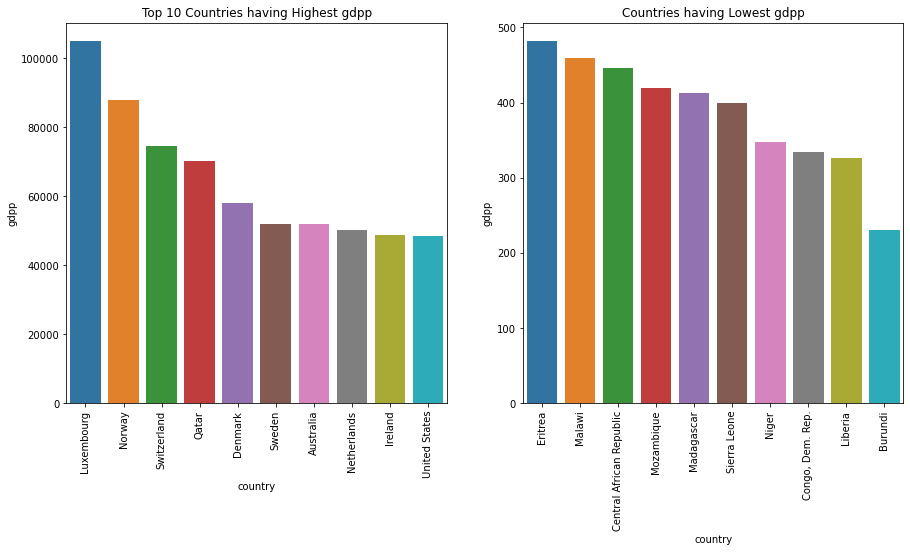

In [20]:
## Country vs gdpp
country_vs_var_bar_plot("gdpp")

#### Observations
- gdpp is highest in Luxembourg followed by Norway
- gdpp is less then 300 in Burundi

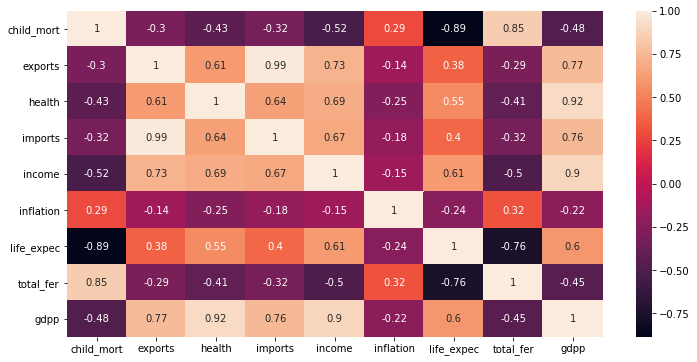

In [21]:
# heatmap to analyse correlation between variables
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(), annot= True)
plt.show();

#### Observations
- gdpp is highly correlated with exports, health, imports and income with correlation coefficient 0.77, 0.92, 0.76 and 0.9 respectively.
- Total fertility is positively correlated with child mortality with correlation coefficient 0.85. Whereas, total fertility is negatively correlated with life expectancy with correlation coefficient -0.76
- life expectancy is negatively correlated with child mortality with correlation coefficient -0.89
- income is correlated with exports with correlation coefficient 0.73
- imports is highly correlated with exports with correlation coefficient 0.99

### Outliers Treatment

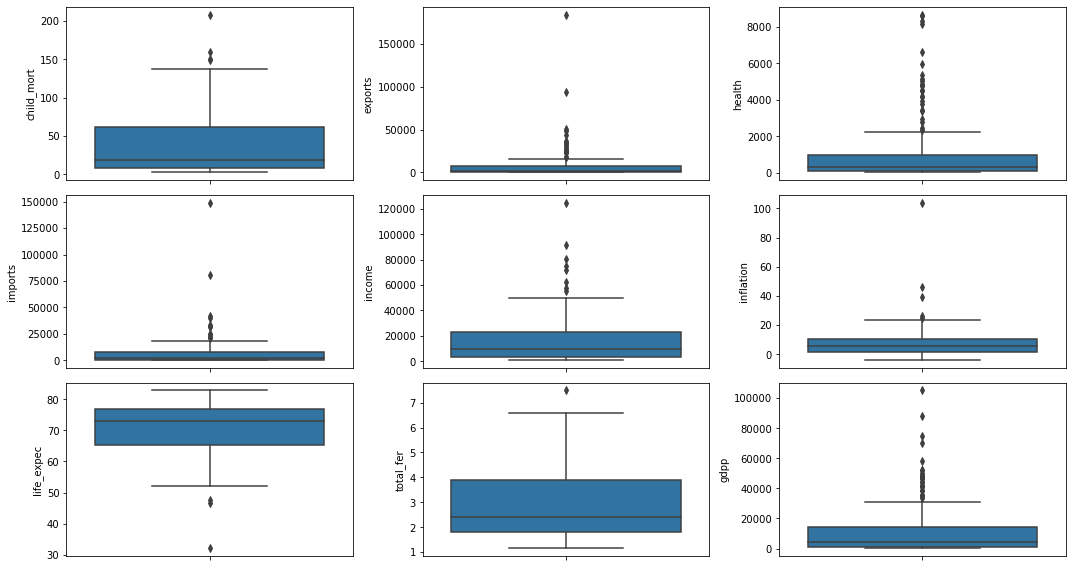

In [22]:
# Checking Outliers
plt.figure(figsize=(15,8))

plt.subplot(3,3,1)
sns.boxplot(y = data["child_mort"])

plt.subplot(3,3,2)
sns.boxplot(y = data["exports"])

plt.subplot(3,3,3)
sns.boxplot(y = data["health"])

plt.subplot(3,3,4)
sns.boxplot(y = data["imports"])

plt.subplot(3,3,5)
sns.boxplot(y = data["income"])

plt.subplot(3,3,6)
sns.boxplot(y = data["inflation"])

plt.subplot(3,3,7)
sns.boxplot(y = data["life_expec"])

plt.subplot(3,3,8)
sns.boxplot(y = data["total_fer"])

plt.subplot(3,3,9)
sns.boxplot(y = data["gdpp"])

plt.tight_layout()

#### Observations
- We can observe from above outlier study using box plot that outliers are present in the data set.
- We can't drop the countries with outliers because this will leads to the loss of data, but we need to treat the outliers otherwise these outliers will deviate the final clustering process.
- To overcome this problem we have used capping.
- We are interested in countries which are in need of aid therefore we will not disturb upper outliers of child mortality, inflation and total fertility. Similarly we will not disturb lower outliers of variables such as exports, imports, health, income, life expectancy and gdpp.

In [23]:
# Percentile values of variable
q1 = data['child_mort'].quantile(0.01)
q2 = data['inflation'].quantile(0.01)
q3 = data['total_fer'].quantile(0.01)
q4 = data['exports'].quantile(0.99)
q5 = data['health'].quantile(0.99)
q6 = data['imports'].quantile(0.99)
q7 = data['income'].quantile(0.99)
q8 = data['life_expec'].quantile(0.99)
q9 = data['gdpp'].quantile(0.99)

In [24]:
# capping lower range outliers of some variables as required
data['child_mort'][data['child_mort']<=q1] = q1
data['inflation'][data['inflation']<=q2] = q2
data['total_fer'][data['total_fer']<=q3] = q3

# Capping upper range outliers of some variables as required
data['exports'][data['exports']>=q4] = q4
data['health'][data['health']>=q5] = q5
data['imports'][data['imports']>=q6] = q6
data['income'][data['income']>=q7] = q7
data['life_expec'][data['life_expec']>=q8] = q8
data['gdpp'][data['gdpp']>=q9] = q9

## CLUSTERING

In [25]:
#checking weather clustering is possible or not using Hopkins

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

data_check_clustering = data.drop("country", axis = 1)
hopkins(data_check_clustering)

0.9528725057354814

#### Observation
Since Hopkins value is 0.95, therefore, clustering is possible in the dataset

### Data Prepration for Clustering

In [26]:
#Scaling using StandardSacler
scaling = StandardScaler()
data_Var = data.drop("country", axis = 1)
data_scaled = scaling.fit_transform(data_Var)

In [27]:
# Scaled dataframe
data_scaled = pd.DataFrame(data_scaled)
data_columns_var = data.columns[1:]
data_scaled.columns = data_columns_var

In [28]:
#looking scaled data frame
data_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291537,-0.569622,-0.566958,-0.598741,-0.851668,0.156035,-1.619705,1.903390,-0.702259
1,-0.538993,-0.473858,-0.440393,-0.413584,-0.386946,-0.314406,0.648831,-0.860816,-0.498726
2,-0.272870,-0.424000,-0.486271,-0.476100,-0.221053,0.788991,0.671403,-0.038846,-0.477434
3,2.007831,-0.381249,-0.534088,-0.463973,-0.612045,1.387733,-1.179541,2.128769,-0.530950
4,-0.695682,-0.086742,-0.178410,0.139728,0.125254,-0.604273,0.705262,-0.542634,-0.032042


### Data Modelling
### K-mean Clustering

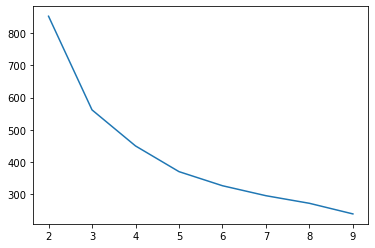

In [29]:
# finding optimal number of clusters using elbow
ssd = []
range_n = [2,3,4,5,6,7,8,9]
for i in range_n:
    kmeans = KMeans(n_clusters=i, max_iter= 50)
    kmeans.fit(data_scaled)
    ssd.append([i, kmeans.inertia_])
ssd_dataframe = pd.DataFrame(ssd)
plt.plot(ssd_dataframe[0], ssd_dataframe[1])
plt.show()

In [61]:
#finding optimal clusters using sheloitte score
range_n = [2,3,4,5,6,7]
for i in range_n:
    kmeans = KMeans(n_clusters=i, max_iter=50)
    kmeans.fit(data_scaled)
    
    cluster_label = kmeans.labels_
    silhouette_average = silhouette_score(data_scaled, cluster_label)
    print("for n cluster {0} Silhouette score is {1}".format(i, silhouette_average))

for n cluster 2 Silhouette score is 0.47855777352323214
for n cluster 3 Silhouette score is 0.422648203001893
for n cluster 4 Silhouette score is 0.40850747073546606
for n cluster 5 Silhouette score is 0.41486998248531126
for n cluster 6 Silhouette score is 0.31609176207109585
for n cluster 7 Silhouette score is 0.31151947346707826


#### Observation
- From elbow curve we can observe that at i = 3 there is a break point and from silhouette score we can observe that for n cluster = 3 we are getting second highest silhouette score value.Therefore, we will take k value as 3

In [31]:
# assuming k = 3
kmeans = KMeans(n_clusters= 3, max_iter= 50, random_state= 100)
kmeans.fit(data_scaled)

KMeans(max_iter=50, n_clusters=3, random_state=100)

In [32]:
# Adding cluster_ID column in original dataframe
data["cluster_ID"] = kmeans.labels_

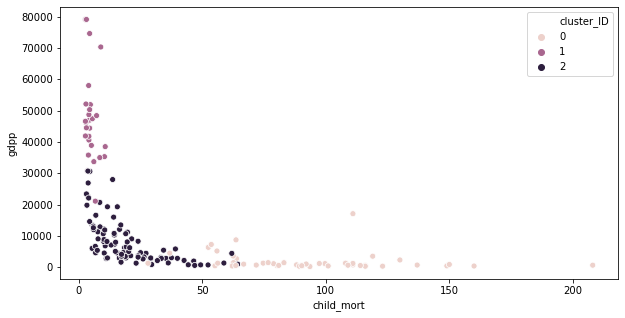

In [33]:
# scatter plot - child mortality vs gdpp
plt.figure(figsize = (10,5))
sns.scatterplot(x = "child_mort", y = "gdpp", data = data, hue = "cluster_ID" )
plt.show()

#### Observation
- We can observe from above scatter plot that cluster_ID 0 have countries with low gdpp, whereas, Cluster_ID 1 have countries with low child mortality and high gdpp.

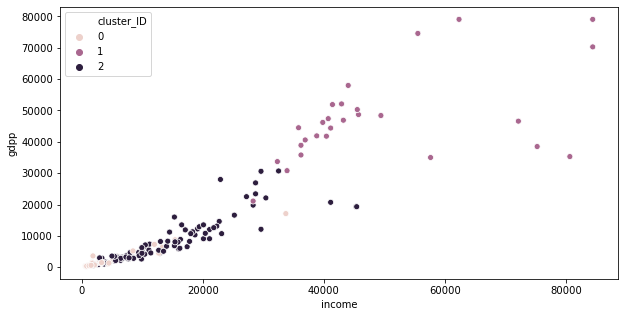

In [34]:
# scatter plot - income vs gdpp
plt.figure(figsize = (10,5))
sns.scatterplot(x = "income", y = "gdpp", data = data, hue = "cluster_ID" )
plt.show()

#### Observation
- We can observe from above scatter plot that cluster_ID 0 have countries with low income and low gdpp, whereas, Cluster_ID 1 is have countries with high income and high gdpp.

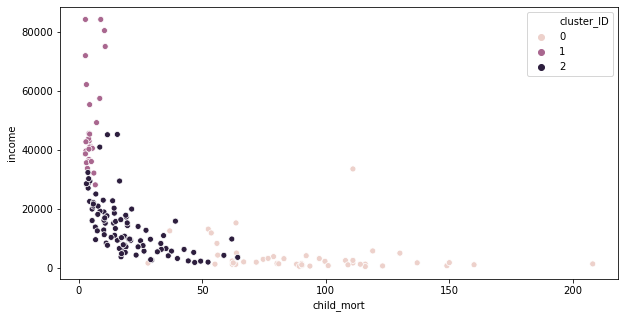

In [35]:
# scatter plot - child mortality vs income
plt.figure(figsize = (10,5))
sns.scatterplot(x = "child_mort", y = "income", data = data, hue = "cluster_ID" )
plt.show()

#### Observation
- We can observe from above scatter plot that cluster_ID 0 have countries with low income, whereas, Cluster_ID 1 have countries with low child mortality and high income.

### Cluster Profiling (K-mean)

In [36]:
#Centriod value of clusters formed
data[["child_mort", "income", "gdpp"]].groupby(data.cluster_ID).mean()

,child_mort,income,gdpp
cluster_ID,,,
0,91.610417,3897.354167,1909.208333
1,5.100000,49057.333333,47476.888889
2,20.177174,14169.456522,8226.869565


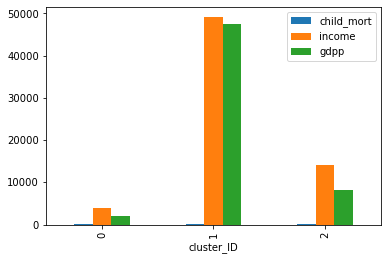

In [37]:
# Visualize the variables with respect to cluster ID
data[["child_mort", "income", "gdpp"]].groupby(data.cluster_ID).mean().plot(kind = "bar");

#### Observation
From above plot it is difficult to say which cluster we need to focus on. Therefore, we will visualize the cluster using boxplot

In [38]:
# function to plot boxplot
def box_plot_clusture(Attribute):
    plt.figure(figsize=(10,7))
    sns.boxplot(x = "cluster_ID", y = Attribute, data = data)
    
    plt.show()

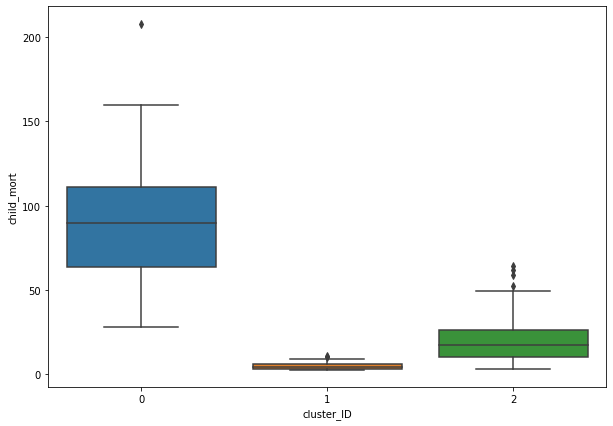

In [39]:
# Cluster ID vs child mortality box plot
box_plot_clusture("child_mort")

#### Observations
- Cluster 0 have countries with high child mortality 
- Cluster 1 have countries with low child mortality.


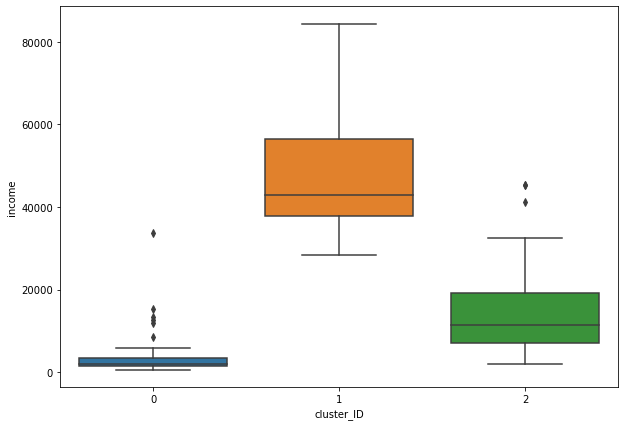

In [40]:
# Cluster ID vs income box plot
box_plot_clusture("income")

#### Observations
- Cluster 1 have countries with high income.
- Cluster 0 have countries with low income.

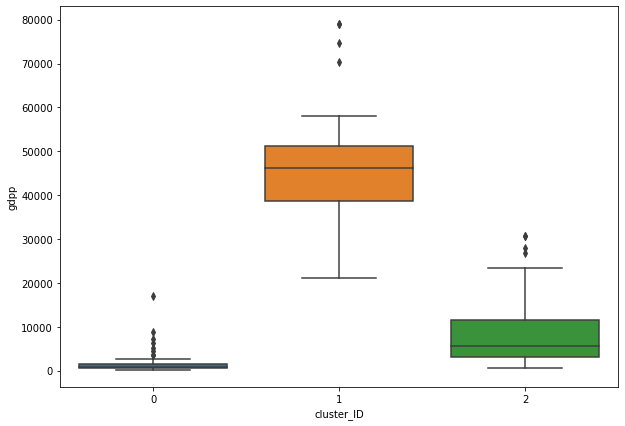

In [41]:
# Cluster ID vs gdpp box plot
box_plot_clusture("gdpp")

#### Observations
- Cluster 1 have countries with high gdpp.
- Cluster 0 have countries with low gdpp.

#### Insight from above plots
- Cluster 0 consist of countries with high chid mortality, low income and low gdpp
- Cluster 1 consist of countries with low child mortality, high income and high gdpp
- Therefore countries in cluster 0 are in direst need of aid according to K-mean clustering.

In [42]:
# Countries in Cluster 2 according to K-mean Clustering
countries_kmean = data[data["cluster_ID"] == 0]
countries_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_ID
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,0
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,0
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,0
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,0


In [43]:
# Countries in direst need of aid according to K-mean clustering.
Countries_in_need = countries_kmean.sort_values(by = ["gdpp", "income", "child_mort"], ascending= [True, True, False]).head(10)
Countries_in_need

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_ID
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231.0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327.0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334.0,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.60,413.0,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.56,419.0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.21,446.0,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.31,459.0,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.61,482.0,0


### Hierarchical Clustering

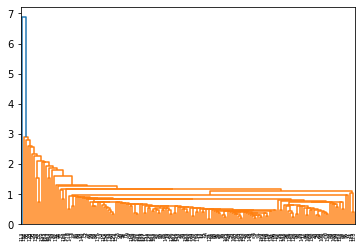

In [44]:
# Finding optimal number of clusters using single linkage
merge = linkage(data_scaled, method="single", metric= "euclidean")
dendrogram(merge)
plt.show()

#### Observation
It is not possible from above plot to figure out number of cluster. Therefore, we will use complete linkage method to find number of clusters.

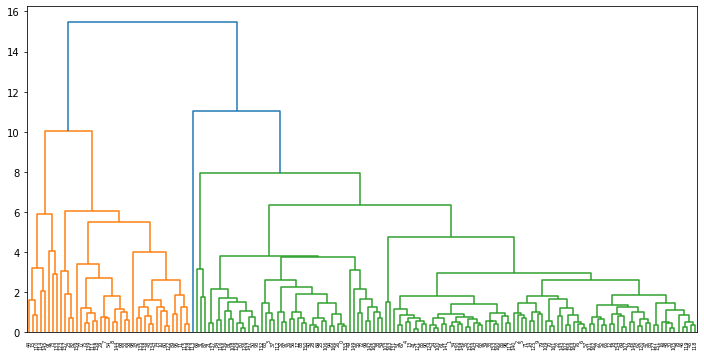

In [45]:
#Finding optimal number of clusters using complete linkage
plt.figure(figsize=(12,6))
merge = linkage(data_scaled, method="complete", metric= "euclidean")
dendrogram(merge)
plt.show()

#### Observations
- To find out number of clusters we will draw a horizontal line at threshold value above 10
- We can observe that number of points cut by the horizontal line above 10 is 3. Therefore, number of clusters = 3

In [46]:
# Finding Cluster labels by taking number of clusters = 3
cluster_label = cut_tree(merge, n_clusters= 3).reshape(-1)

In [47]:
# adding cluster_ID column in the original data set
data["cluster_ID_hierarchy"] = cluster_label
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_ID,cluster_ID_hierarchy
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2,0


In [48]:
# Value count of Cluster_ID_hierarchy
data.cluster_ID_hierarchy.value_counts()

0    125
1     41
2      1
Name: cluster_ID_hierarchy, dtype: int64

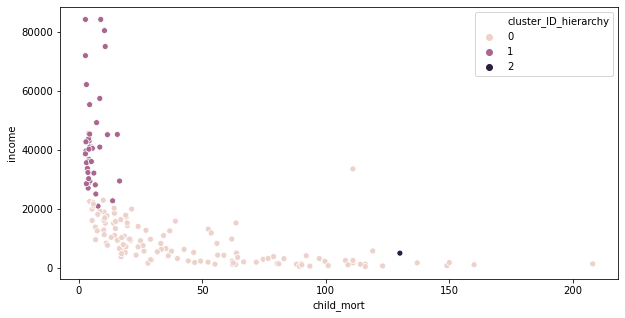

In [49]:
# scatter plot - child mortality vs income
plt.figure(figsize = (10,5))
sns.scatterplot(x = "child_mort", y = "income", data = data, hue = "cluster_ID_hierarchy" )
plt.show()

#### Observations
- We can observe from above scatter plot that cluster_ID_Hierarchy 0 have countries with low income, whereas, cluster_ID_Hierarchy 1 have countries with low child mortality and higH income.
- We can also observe that only 1 country has been assigend under cluster_ID_Hierarchy 2

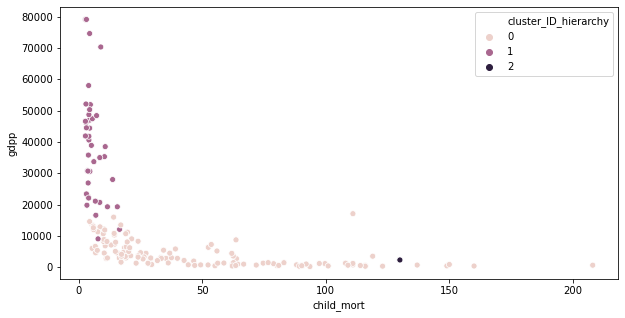

In [50]:
# scatter plot - child mortality vs gdpp
plt.figure(figsize = (10,5))
sns.scatterplot(x = "child_mort", y = "gdpp", data = data, hue = "cluster_ID_hierarchy" )
plt.show()

#### Observations
- We can observe from above scatter plot that cluster_ID_Hierarchy 0 have countries with low gdpp, whereas, cluster_ID_Hierarchy 1 have countries with low child mortality and high gdpp.
- We can also observe that only 1 country has been assigend under cluster_ID_Hierarchy 2

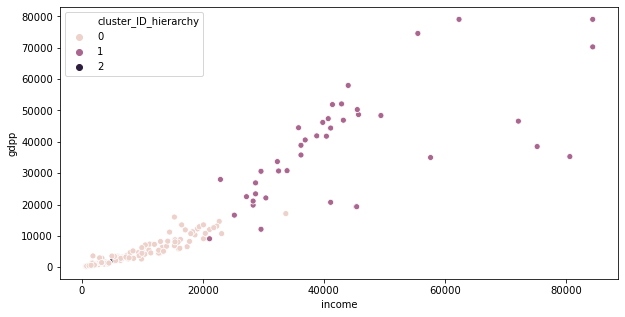

In [51]:
# scatter plot - income vs gdpp
plt.figure(figsize = (10,5))
sns.scatterplot(x = "income", y = "gdpp", data = data, hue = "cluster_ID_hierarchy" )
plt.show()

#### Observations
- we can observe from above scatter plot that cluster_ID_Hierarchy 0 have countries with low income and low gdpp, whereas,cluster_ID_Hierarchy 1 have countries with high income and high gdpp 

### Cluster Profiling (Hierarchical)

In [52]:
#Center data value of cluster formed according to Hierarchical clustering
data[["child_mort", "income", "gdpp"]].groupby(data.cluster_ID_hierarchy).mean()

,child_mort,income,gdpp
cluster_ID_hierarchy,,,
0,48.123200,8396.104000,4360.912000
1,5.997561,42940.195122,38608.439024
2,130.000000,5150.000000,2330.000000


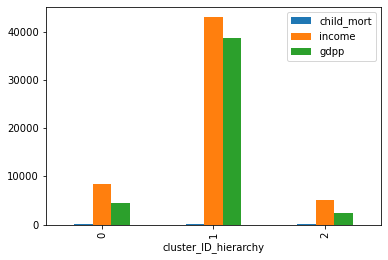

In [53]:
# Visualize the variables with respect to cluster_ID_hierarchy
data[["child_mort", "income", "gdpp"]].groupby(data.cluster_ID_hierarchy).mean().plot(kind = "bar");

#### Observation
From above plot it is difficult to say which cluster we need to focus on. Therefore, we will visualize the cluster using boxplot

In [54]:
# Function to plot boxplot 
def box_plot_H_clusture(Attribute):
    plt.figure(figsize=(10,7))
    sns.boxplot(x = "cluster_ID_hierarchy", y = Attribute, data = data)
    
    plt.show()

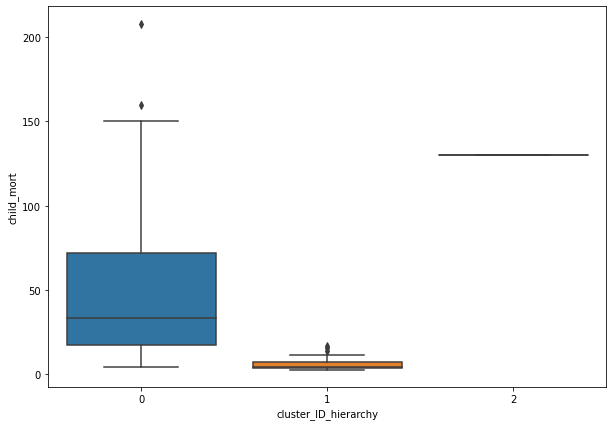

In [55]:
# Cluster ID vs child mortality box plot
box_plot_H_clusture("child_mort")

#### Observations
- Cluster 0 have countries with high Child Mortality.
- Cluster 1 have countries with low child Mortality.
- cluster 2 have only one data point.

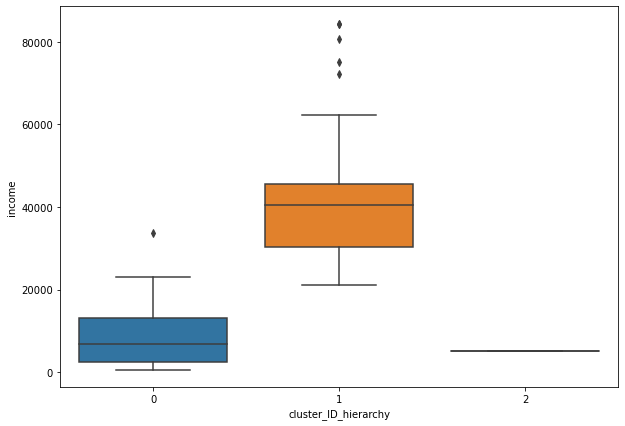

In [56]:
# Cluster ID vs income box plot
box_plot_H_clusture("income")

#### Observations
- Cluster 0 have countries with low income.
- Cluster 1 have countries with high income.
- Cluster 2 has only one data point

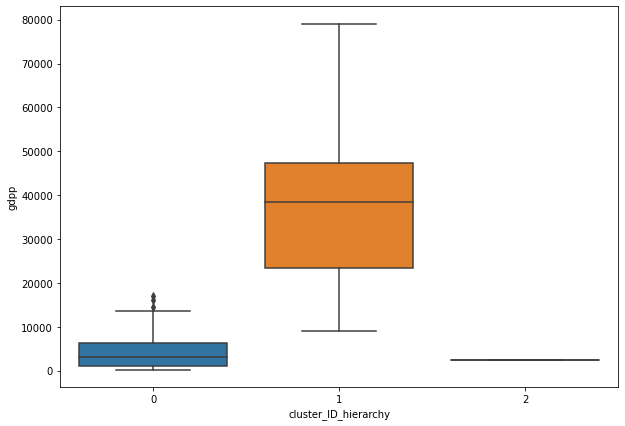

In [57]:
# Cluster ID vs gdpp box plot
box_plot_H_clusture("gdpp")

#### Observation
- Cluster 0 have countries with low gdpp.
- Cluster 1 have countries with high gdpp.
- Cluster 2 has only one data point

#### Insight from above plots
- Cluster 0 consist of countries with high chid mortality, low income and low gdpp.
- Cluster 1 consist of countries with low child mortality, high income and high gdpp.
- Therefore countries in cluster 0 are in direst need of aid according to K-mean clustering.

In [58]:
# Countries in Cluster 0 according to Hierarchy Clustering
countries_Hierarchy = data[data["cluster_ID_hierarchy"] == 0]
countries_Hierarchy.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_ID,cluster_ID_hierarchy
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2,0


In [59]:
# Countries in direst need of aid according to Hierarchical clustering.
countries_Hierarchy.sort_values(by = ["gdpp", "income", "child_mort"], ascending= [True, True, False]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_ID,cluster_ID_hierarchy
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231.0,0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327.0,0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334.0,0,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,0,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0,0,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.60,413.0,0,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.56,419.0,0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.21,446.0,0,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.31,459.0,0,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.61,482.0,0,0


##### Observation
- We can observe from the plots (scatter plot & boxplot) between gdpp, income and child mortality that under cluster 2 only 1 country is assigend. Therefore we will go with k-mean clustering Algorithm.

## CONCLUSION & RECOMMENDATIONS

In [60]:
# 5 Countries in direst need of aid are
Countries_in_need = pd.DataFrame(Countries_in_need["country"]).head()
Countries_in_need

,country
26,Burundi
88,Liberia
37,"Congo, Dem. Rep."
112,Niger
132,Sierra Leone


- The CEO of the NGO should majorly focus on the countries with low gdpp. Since most of the other factors such as imports, exports, health and income is highly correlated with the gdpp factor.
- NGO should also focus on the countries with high child mortality. Child mortality is highly positively correlated with total fertility and negatively correlated with life expectancy factor, therefore, no need to look after the other two variables.
- Since countries with less imports and exports will not have source of income from this major sector which helps in improving economy of the country, therefore, countries with less exports and imports of goods and services per capita should also be considered. 
- All other factors are highly correlated with child mortality and gdpp, therefore, CEO should focus on the countries with high child mortality and low gdpp only.
- 5 countries which are in direst need of aid are - "Burundi", "Liberia", "Congo, Dem.Rep", "Niger", "Sierra Leone".